# Author: Ashish Sinha
## Mushroom Dataset
### Aim: Classify whether the mushrooms are edible or poisonous

In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
#checking working directory
import os
os.getcwd()

'C:\\Users\\LENOVO\\Downloads'

In [8]:
#Loading train and test data
train=pd.read_csv('mushroom_train.csv')
test=pd.read_csv('mushroom_test.csv')

In [9]:
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [10]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,f,c,b,u,t,...,p,g,p,w,23,o,p,k,y,d
1,x,y,g,f,f,f,c,b,g,e,...,b,b,p,w,23,o,l,h,v,d
2,b,s,w,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,s,m
3,f,y,y,f,f,f,c,b,p,e,...,n,b,p,w,53,o,l,h,y,d
4,b,y,y,t,a,f,c,b,w,e,...,w,w,p,w,24,o,p,k,n,m


In [11]:
print "The size of train data is ",train.shape
print "The size of test data is ",test.shape

The size of train data is  (5686, 25)
The size of test data is  (2438, 24)


### Variable Identification and their types

In [12]:
#A peek at data
train.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
radius                       int64
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
weight                       int64
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [14]:
categorical=train.dtypes[train.dtypes=='object']
continuous=train.dtypes[train.dtypes=='int64']
print "Categorical Features: "+str([i[0] for i in categorical.iteritems()])
print "\nContinuous Features: "+str([i[0] for i in continuous.iteritems()])
print "\nTarget Variable: "+str([train.columns[0]])

Categorical Features: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Continuous Features: ['radius', 'weight']

Target Variable: ['class']


As per the description of the features above.<br/>
It seems that only 2 are continuous features while the rest are categorical.<br>
So, **we will encode the categorical features.**<br>
But first,let's see if there are any missing values.

In [13]:
#checking for missing values
train.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
radius                      0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
weight                      0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##### It seems that are no missing values.
### Univariate Analysis

In [16]:
#For Categorical Variables we use count for analysis
for var in categorical.iteritems():
    print(var[0])
    print 
    counts = train[var[0]].value_counts()
    totalCounts = sum([x[1] for x in counts.iteritems()])
    for name,val in counts.iteritems():
        print("%.2f%%"%((val*1.0/totalCounts)*100.0),name,"(%d)"%(val))
    print

class

('51.79%', 'e', '(2945)')
('48.21%', 'p', '(2741)')

cap-shape

('45.34%', 'x', '(2578)')
('38.32%', 'f', '(2179)')
('10.38%', 'k', '(590)')
('5.49%', 'b', '(312)')
('0.40%', 's', '(23)')
('0.07%', 'c', '(4)')

cap-surface

('40.36%', 'y', '(2295)')
('31.01%', 's', '(1763)')
('28.56%', 'f', '(1624)')
('0.07%', 'g', '(4)')

cap-color

('28.14%', 'n', '(1600)')
('22.72%', 'g', '(1292)')
('18.47%', 'e', '(1050)')
('13.30%', 'y', '(756)')
('12.66%', 'w', '(720)')
('1.97%', 'b', '(112)')
('1.83%', 'p', '(104)')
('0.56%', 'c', '(32)')
('0.21%', 'u', '(12)')
('0.14%', 'r', '(8)')

bruises

('58.00%', 'f', '(3298)')
('42.00%', 't', '(2388)')

odor

('43.74%', 'n', '(2487)')
('26.40%', 'f', '(1501)')
('7.23%', 's', '(411)')
('7.00%', 'y', '(398)')
('4.92%', 'l', '(280)')
('4.75%', 'a', '(270)')
('3.31%', 'p', '(188)')
('2.23%', 'c', '(127)')
('0.42%', 'm', '(24)')

gill-attachment

('97.64%', 'f', '(5552)')
('2.36%', 'a', '(134)')

gill-spacing

('83.87%', 'c', '(4769)')
('16.13%', 'w', 

In [17]:
#For Continuous Variables we use describe
train.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


### Bivariate Analysis

In [18]:
#For Categorical-Categorical we use CROSSTAB
alreadyDone = []
for i in categorical.iteritems():
    for j in categorical.iteritems():
        if(i[0]!=j[0] and (i[0],j[0]) not in alreadyDone and (j[0],i[0]) not in alreadyDone):
            alreadyDone.append((i[0],j[0]))
            print(pd.crosstab(index=train[i[0]],columns=train[j[0]]))
            print

cap-shape    b  c     f    k   s     x
class                                 
e          278  0  1094  161  23  1389
p           34  4  1085  429   0  1189

cap-surface     f  g    s     y
class                          
e            1090  0  790  1065
p             534  4  973  1230

cap-color   b   c    e    g    n   p  r   u    w    y
class                                                
e          33  24  453  728  872  42  8  12  497  276
p          79   8  597  564  728  62  0   0  223  480

bruises     f     t
class              
e        1004  1941
p        2294   447

odor     a    c     f    l   m     n    p    s    y
class                                              
e      270    0     0  280   0  2395    0    0    0
p        0  127  1501    0  24    92  188  411  398

gill-attachment    a     f
class                     
e                121  2824
p                 13  2728

gill-spacing     c    w
class                  
e             2106  839
p             2663   78

g

y            24  20  541  436  671  31  8  12  161  391

bruises         f     t
cap-surface            
f             976   648
g               0     4
s            1156   607
y            1166  1129

odor           a   c    f    l   m     n   p    s    y
cap-surface                                           
f             18  67  455   19   0  1065   0    0    0
g              0   0    0    0   0     4   0    0    0
s            104  60  385  102   0   611  96  205  200
y            148   0  661  159  24   807  92  206  198

gill-attachment    a     f
cap-surface               
f                  0  1624
g                  0     4
s                121  1642
y                 13  2282

gill-spacing     c    w
cap-surface            
f             1179  445
g                0    4
s             1327  436
y             2263   32

gill-size       b    n
cap-surface           
f            1426  198
g               0    4
s             985  778
y            1518  777

gill-color     b   e

stalk-surface-below-ring    f    k     s    y
cap-color                                    
b                          29    0    83    0
c                           9    0    15    8
e                           0  295   747    8
g                         121  500   671    0
n                          94  304  1096  106
p                           0    0   104    0
r                           8    0     0    0
u                          12    0     0    0
w                         135   55   530    0
y                           0  460   217   79

stalk-color-above-ring    b  c   e    g    n    o    p    w  y
cap-color                                                     
b                         0  0  15    0    0    0    0   97  0
c                         0  8   0    0    0    0    0   24  0
e                         0  8  17  146    0    0  422  457  0
g                       141  0   0  145  157    0  279  570  0
n                         0  8  18  139   13  121  439  862  0
p     

gill-spacing     c    w
odor                   
a              239   31
c               65   62
f             1501    0
l              243   37
m               24    0
n             1700  787
p              188    0
s              411    0
y              398    0

gill-size     b    n
odor                
a           239   31
c             0  127
f          1110  391
l           243   37
m            24    0
n          2313  174
p             0  188
s             0  411
y             0  398

gill-color    b   e    g    h    k    n   o    p   r    u    w   y
odor                                                              
a             0   0   47    0   41   74   0   31   0    0   77   0
c             0   0   35    0    0   34   0   29   0   29    0   0
f           391   0  292  381    0    0   0  377   0    0   60   0
l             0   0   45    0   44   77   0   34   0    0   80   0
m             0   0    0    0    0    0   0    0   0    0   13  11
n             0  70  107  149  134

stalk-color-below-ring    b   c   e    g    n    o     p     w   y
gill-attachment                                                   
a                         0  13   0    0    0  121     0     0   0
f                       313  11  69  424  355    0  1284  3075  21

veil-type           p
gill-attachment      
a                 134
f                5552

veil-color        n   o     w  y
gill-attachment                 
a                70  51    13  0
f                 0   0  5544  8

ring-number       n     o    t
gill-attachment               
a                13   121    0
f                11  5106  435

ring-type           e   f    l   n     p
gill-attachment                         
a                   0   0    0  13   121
f                1931  32  911  11  2667

spore-print-color   b     h     k     n   o   r   u     w   y
gill-attachment                                              
a                  32     0     0    31  26   0   0    13  32
f                   0  1142  1284

y                         0  11   0    0    0  41    0    0  4

stalk-color-below-ring    b   c   e    g    n   o    p    w   y
gill-color                                                     
b                         0   0   0    0    0   0  585  615   0
e                         0   0  34    0    0   0    0   36   0
g                       104   0   0    0   92   0   96  234   0
h                       106   0   0    0  102   0  104  218   0
k                         0   0   0    0    0   0    0  269   0
n                         0   0   0  101    0  41  103  483   0
o                         0   0   0    0    0  39    0    0   0
p                       103   0   0  107  102   0  205  549   0
r                         0   0   0    0    0   0    0   17   0
u                         0   0   0  111    0   0   98  132   0
w                         0  13  35  105   59   0   93  522  17
y                         0  11   0    0    0  41    0    0   4

veil-type      p
gill-color      
b    

habitat        d    g    l    m    p    u    w
stalk-root                                    
?            465  211  517    0  395    0  139
b           1738  429   43   23  335   97    0
c             24  175    8  175    0    0    0
e              0  621    0    0    0  159    0
r              0   64    0    0   68    0    0

stalk-surface-below-ring    f     k     s    y
stalk-surface-above-ring                      
f                         193     0   187    0
k                           0  1263   350   48
s                         215   351  2926  132
y                           0     0     0   21

stalk-color-above-ring      b   c   e    g    n    o    p     w  y
stalk-surface-above-ring                                          
f                           0   0   0    0    0    0    0   380  0
k                         297  24   0    0  302    0  608   430  0
s                           0   0  70  430    0  121  691  2312  0
y                           0   0   0    0   13    0

y                        0   0    13  8

ring-number              n     o    t
stalk-color-below-ring               
b                        0   313    0
c                       24     0    0
e                        0     0   69
g                        0   424    0
n                        0   342   13
o                        0   121    0
p                        0  1284    0
w                        0  2722  353
y                        0    21    0

ring-type                  e   f    l   n     p
stalk-color-below-ring                         
b                          0   0  313   0     0
c                          0   0    0  24     0
e                         69   0    0   0     0
g                          0   0    0   0   424
n                         46   0  296   0    13
o                          0   0    0   0   121
p                        585   0  302   0   397
w                       1210  32    0   0  1833
y                         21   0    0   0     0

spore-print

Correlation between radius and weight is -0.01


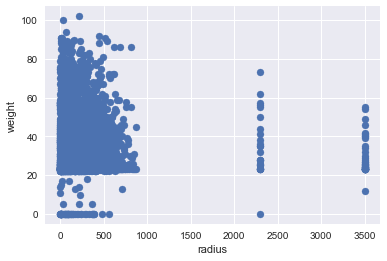

In [19]:
#For Continuous-Continuous we use Scatter Plot and Correlation
alreadyDone = []
for i in continuous.iteritems():
    for j in continuous.iteritems():
        if(i[0]!=j[0] and (i[0],j[0]) not in alreadyDone and (j[0],i[0]) not in alreadyDone):
            alreadyDone.append((i[0],j[0]))
            print("Correlation between %s and %s is %.2f"%(i[0],j[0],train[i[0]].corr(train[j[0]])))
            plt.scatter(train[i[0]],train[j[0]])
            plt.xlabel("%s"%(i[0]))
            plt.ylabel("%s"%(j[0]))
            plt.show()

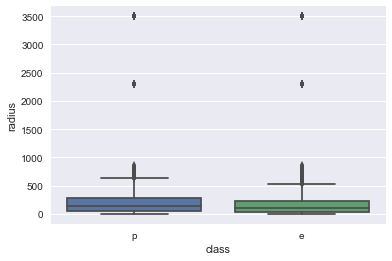

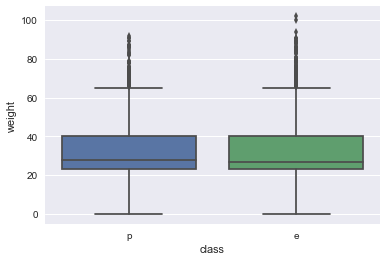

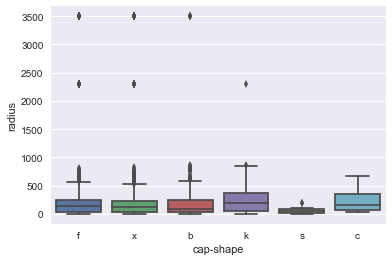

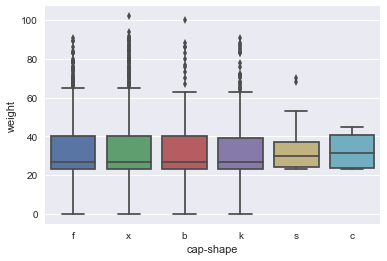

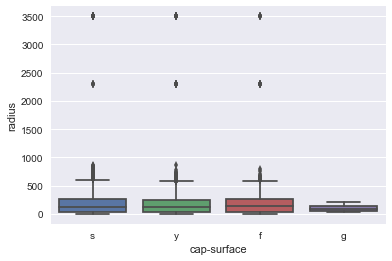

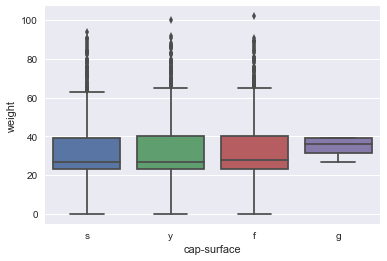

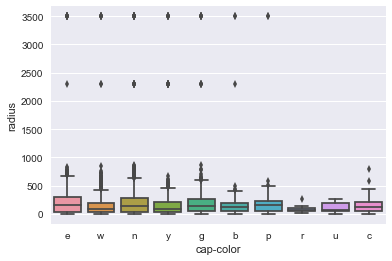

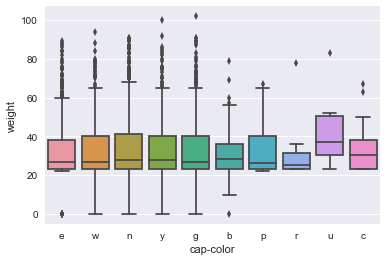

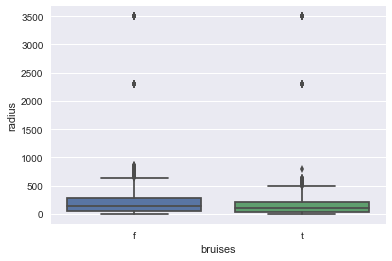

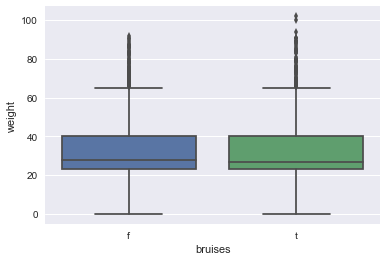

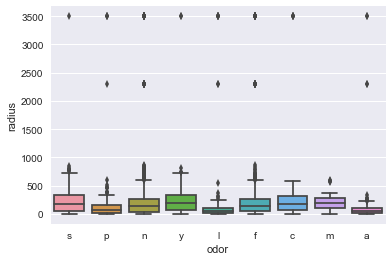

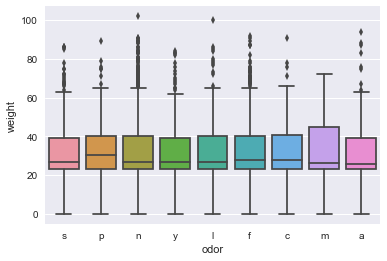

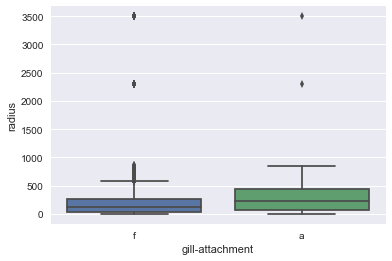

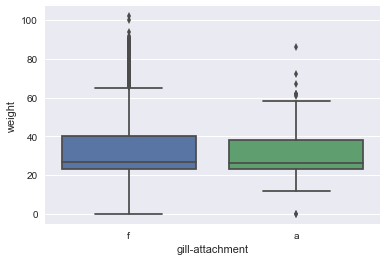

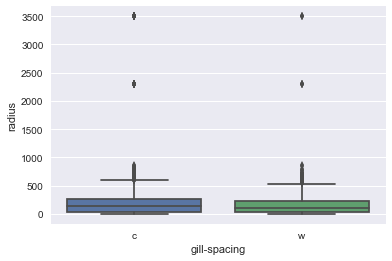

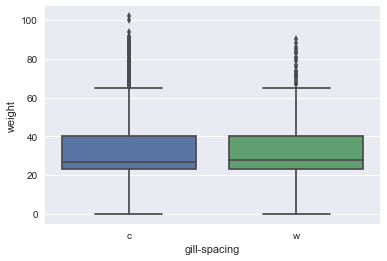

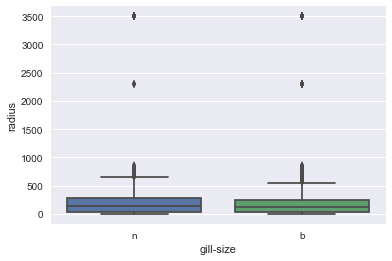

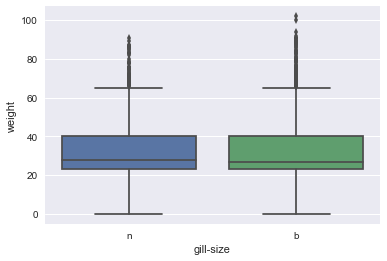

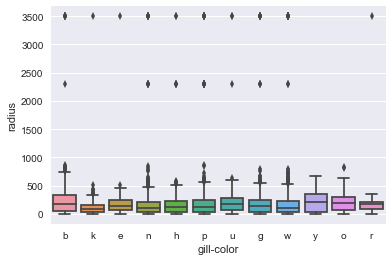

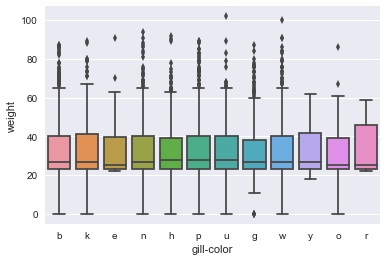

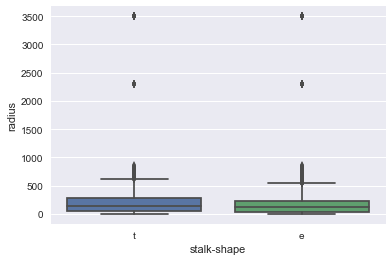

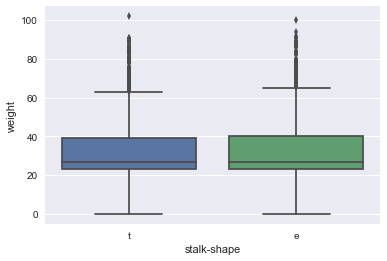

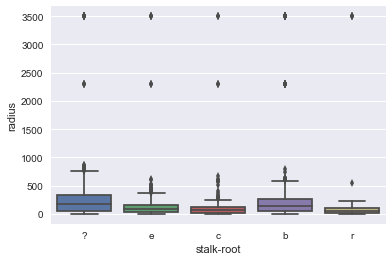

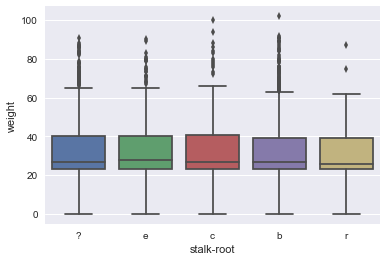

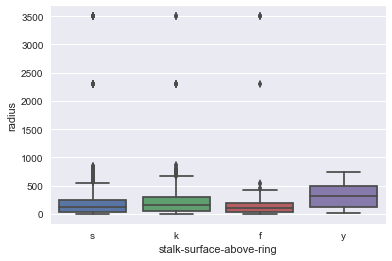

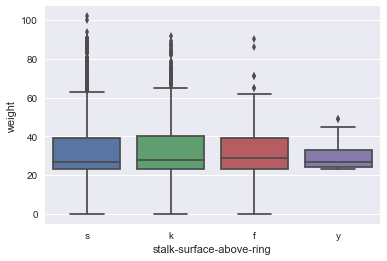

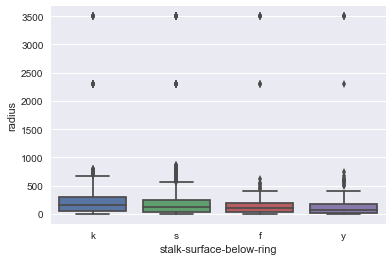

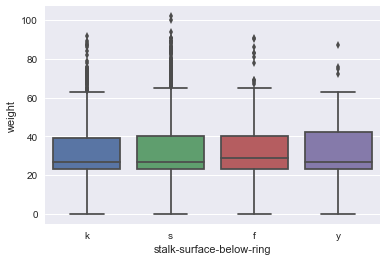

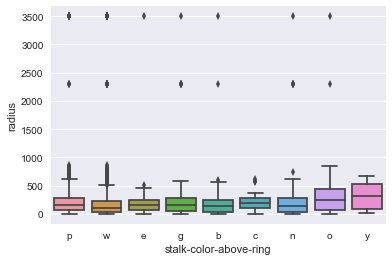

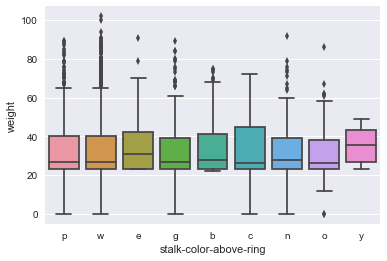

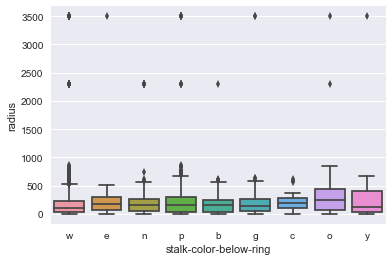

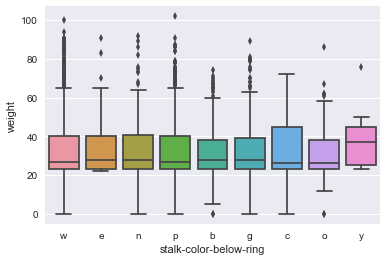

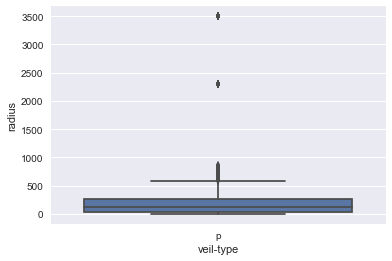

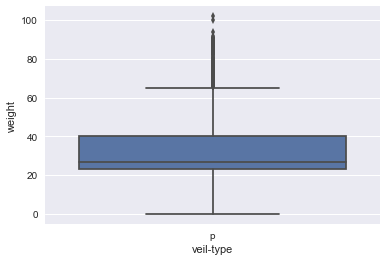

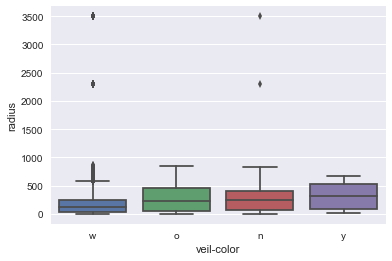

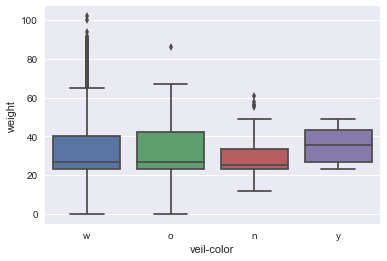

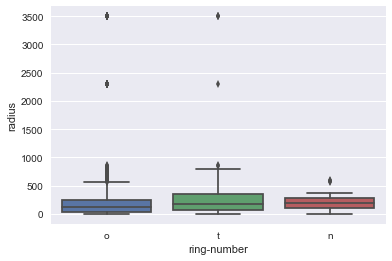

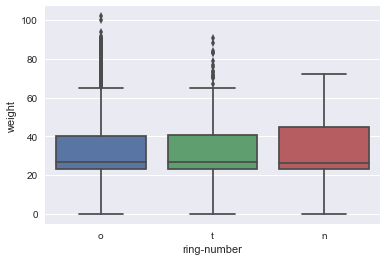

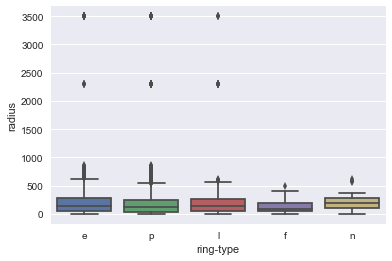

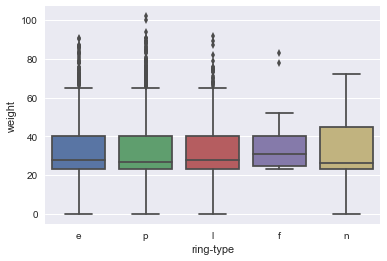

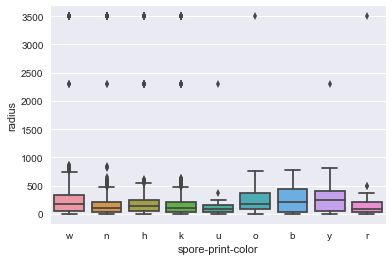

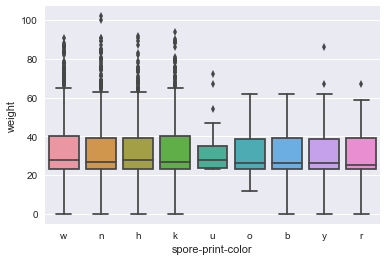

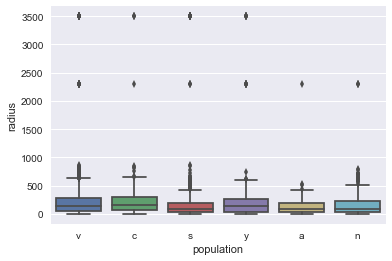

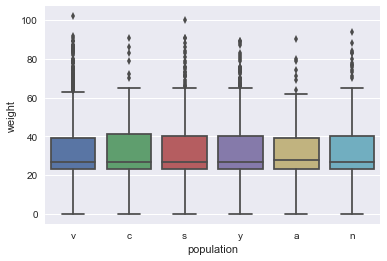

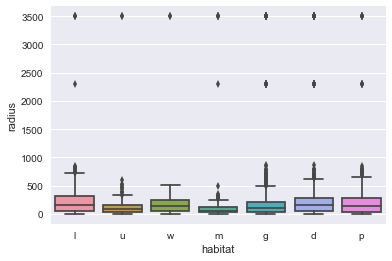

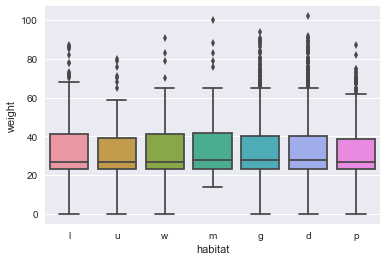

In [20]:
#For Categorical-Continuous we use Box Plot

for i in categorical.iteritems():
    for j in continuous.iteritems():
        sns.boxplot(train[i[0]],train[j[0]])
        plt.show()


### Label Encoder

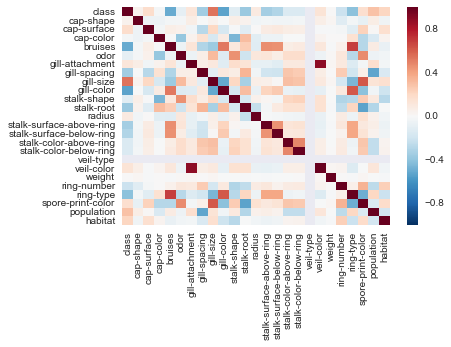

In [132]:
#A correlation between variables
sns.heatmap(train.corr())

In [44]:
#Encoding the train and test data
le=LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])

In [51]:
#Splitting the train and test data for better performance
X=train.iloc[:,1:]
y=train.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [55]:
#checking the size of the data
for data in [X_train,X_test,y_train,y_test]:
    print data.shape

(3809, 24)
(1877, 24)
(3809L,)
(1877L,)


## Building our ML Pipeline 
###### `Without Important Fearure Selection`
### Logistic Regression


In [60]:
#Fitting our Model
model1=LogisticRegression()
model1.fit(X_train,y_train)
#Checking accuracy on train
LR_acc_train=accuracy_score(model1.predict(X_train),y_train)
#checking accuracy on test set
LR_acc_test=accuracy_score(model1.predict(X_test),y_test)

In [61]:
print "Accuracy Score on Train Set for Logistic Regression: ",LR_acc_train*100
print "Accuracy Score on Test Set for Logistic Regression: ",LR_acc_test*100

Accuracy Score on Train Set for Logistic Regression:  0.950118141244
Accuracy Score on Test Set for Logistic Regression:  0.946190729888


### Decision Tree

In [62]:
#Fitting our Model
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
#Checking accuracy on train
DT_acc_train=accuracy_score(model2.predict(X_train),y_train)
#checking accuracy on test set
DT_acc_test=accuracy_score(model2.predict(X_test),y_test)

In [64]:
print "Accuracy Score on Train Set for Decision Tree: ",DT_acc_train*100
print "Accuracy Score on Test Set for Decision Tree: ",DT_acc_test*100

Accuracy Score on Train Set for Decision Tree:  100.0
Accuracy Score on Test Set for Decision Tree:  100.0


### Random Forest Classifier

In [69]:
#Fitting our Model
model3=RandomForestClassifier(n_estimators=10)
model3.fit(X_train,y_train)
#Checking accuracy on train
RFC_acc_train=accuracy_score(model3.predict(X_train),y_train)
#checking accuracy on test set
RFC_acc_test=accuracy_score(model3.predict(X_test),y_test)

In [70]:
print "Accuracy Score on Train Set for Random Forest: ",RFC_acc_train*100
print "Accuracy Score on Test Set for Random Forest: ",RFC_acc_test*100

Accuracy Score on Train Set for Random Forest:  100.0
Accuracy Score on Test Set for Random Forest:  100.0


### SVM

In [73]:
#Fitting our Model
model4=SVC()
model4.fit(X_train,y_train)
#Checking accuracy on train
SVM_acc_train=accuracy_score(model4.predict(X_train),y_train)
#checking accuracy on test set
SVM_acc_test=accuracy_score(model4.predict(X_test),y_test)

In [74]:
print "Accuracy Score on Train Set for SVM: ",SVM_acc_train*100
print "Accuracy Score on Test Set for SVM: ",SVM_acc_test*100

Accuracy Score on Train Set for SVM:  99.8687319506
Accuracy Score on Test Set for SVM:  83.8572189664


### Cross Validation Score for the above Algorithms

In [77]:

from sklearn.model_selection import cross_val_score
print("Random Forests: ")
print(cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model3, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

print("\n\nSVM:")
print(cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model4, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)
 
print("\n\nLog:")
print(cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)

print("\n\nDecision Tree:")
print(cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 10))
accuracy = cross_val_score(model2, X_train, y_train, scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Decision Tree is: " , accuracy)

Random Forests: 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
('Accuracy of Random Forests is: ', 100.0)


SVM:
[ 0.82722513  0.79057592  0.832021    0.82152231  0.84251969  0.84776903
  0.86089239  0.81578947  0.85789474  0.81842105]
('Accuracy of SVM is: ', 83.146307197271312)


Log:
[ 0.94764398  0.95811518  0.94488189  0.94750656  0.95800525  0.93700787
  0.95538058  0.94210526  0.95        0.95      ]
('Accuracy of SVM is: ', 94.906465776925302)


Decision Tree:
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
('Accuracy of Decision Tree is: ', 100.0)


## Making Predictions on Test Data

In [104]:

l=LabelEncoder()
for col in test.columns:
    test[col] = l.fit_transform(test[col])
test.drop(['prediction'],axis=1,inplace=True)
test['prediction']=model3.predict(test)
print "Edible:",test['prediction'].value_counts()[0]*100.0/test.shape[0]
print "Poisonous:",test['prediction'].value_counts()[1]*100.0/test.shape[0]


Edible: 51.8047579984
Poisonous: 48.1952420016


## Feature Importance
##### Since, Random Forest performs the best on the cross validation data.
We shall use it `RFC` for feature selection


Feature ranking:
1. feature gill-spacing (0.200781)
2. feature bruises (0.131332)
3. feature spore-print-color (0.127946)
4. feature ring-type (0.082414)
5. feature gill-size (0.073868)
6. feature ring-number (0.068012)
7. feature stalk-surface-above-ring (0.056237)
8. feature radius (0.039557)
9. feature population (0.039322)
10. feature cap-color (0.035712)
11. feature gill-attachment (0.033427)
12. feature stalk-shape (0.025947)
13. feature cap-surface (0.019628)
14. feature stalk-surface-below-ring (0.017058)
15. feature weight (0.014986)
16. feature stalk-color-above-ring (0.013240)
17. feature odor (0.005884)
18. feature cap-shape (0.005320)
19. feature class (0.004592)
20. feature veil-type (0.002075)
21. feature gill-color (0.000971)
22. feature stalk-root (0.000903)
23. feature veil-color (0.000787)
24. feature stalk-color-below-ring (0.000000)


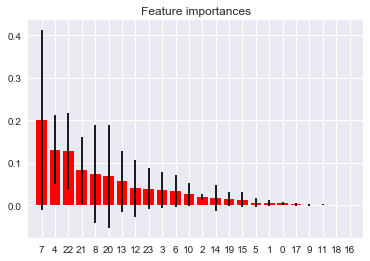

In [83]:
importances=model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Thus, it can be seen that all features are not important.<br>
`gill-spacing and bruises` are highly influencing the poisonous state of mushrooms<br>
whereas features like `stalk-root`, `veil-color`,`stalk-color-below-ring` are almost useless in prediction<br>
So, we will again make predictions using important features

### Building our ML Pipeline with important features


In [111]:
#Selecting important features
predictors=['gill-spacing','bruises','spore-print-color','ring-type','gill-size'
,'ring-number','stalk-surface-above-ring','radius','population','cap-color',
'gill-attachment','stalk-shape','cap-surface']
data_train=X_train[predictors]
data_test=X_test[predictors]

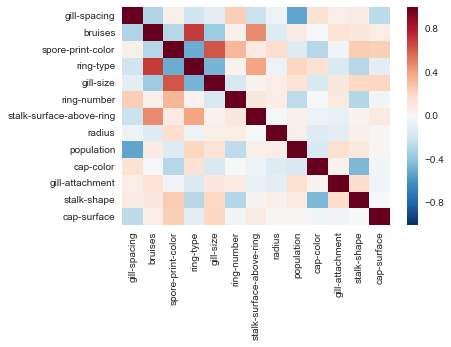

In [131]:
##A correlation between new variables
sns.heatmap(data_train.corr())

### Fitting all Models and Checking the CV score

In [119]:

models=[LogisticRegression(),DecisionTreeClassifier(random_state=0),RandomForestClassifier(n_estimators=10),SVC()]
model_names=['LR','DT','RFC','SVM']
for model in models:
    print("\n\n%s:"%model_names[models.index(model)])
    print(cross_val_score(model, data_train, y_train, scoring='accuracy', cv = 10))
    accuracy = cross_val_score(model, data_train, y_train, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy of %s is: %f"%(model_names[models.index(model)],accuracy))



LR:
[ 0.94764398  0.95026178  0.93963255  0.92388451  0.95013123  0.93700787
  0.95013123  0.92368421  0.93684211  0.93684211]
Accuracy of LR is: 93.960616


DT:
[ 0.9973822   0.9973822   0.99737533  1.          1.          0.99212598
  1.          1.          0.99736842  0.99736842]
Accuracy of DT is: 99.790026


RFC:
[ 0.9973822   0.9973822   1.          0.99737533  1.          0.99475066
  1.          1.          1.          0.99736842]
Accuracy of RFC is: 99.868697


SVM:
[ 0.88481675  0.87958115  0.89238845  0.86614173  0.88451444  0.88188976
  0.89238845  0.86578947  0.91052632  0.85789474]
Accuracy of SVM is: 88.159313


## Random Forest Performs the Best
###### Though there is a little change in the accuracy. The performance of SVM has increased.

## Predicting using our New Feature Model

In [124]:

rfc=models[2].fit(data_train,y_train)
predictions=pd.Series(models[2].predict(test[predictors]))
predictions.head()


0    0
1    1
2    0
3    1
4    0
dtype: int64

In [125]:
print "Edible:",predictions.value_counts()[0]*100.0/test.shape[0]
print "Poisonous:",predictions.value_counts()[1]*100.0/test.shape[0]

Edible: 51.9688269073
Poisonous: 48.0311730927


### Clearly, there is a diff. in the % of edible mushrooms :wink: